# Relaxation Problem for Branch Cut


Given integer $N$ and array $X$ of length $2^N$.

By multiplying $1,1j,-1$ or $-1j$ to each value, we can get $2^N$ complex values.

Maximize the absolute value of the sum of these $2^N$ complex values.


-1=-1, sum(x.real for x in Xs)=-7.0, sum(x.imag for x in Xs)=-3.0


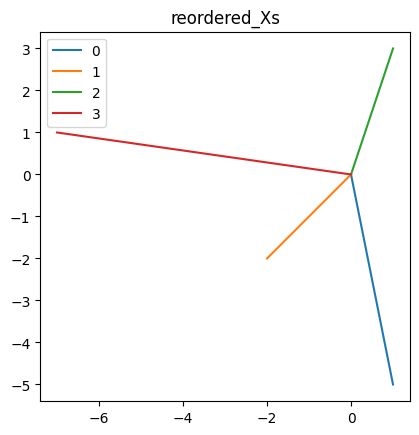

0=0, sumYsReal=9.0, sumYsImag=13.0, sumYsReal**2 + sumYsImag**2=250.0


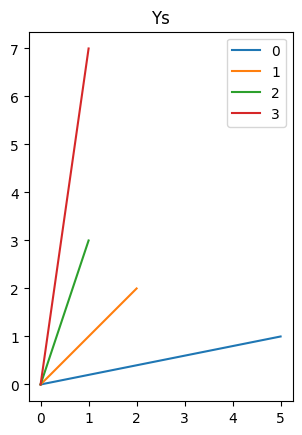

i=0, sumYsReal=3.0, sumYsImag=17.0, sumYsReal**2 + sumYsImag**2=298.0


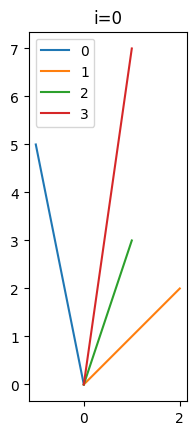

i=1, sumYsReal=-1.0, sumYsImag=17.0, sumYsReal**2 + sumYsImag**2=290.0


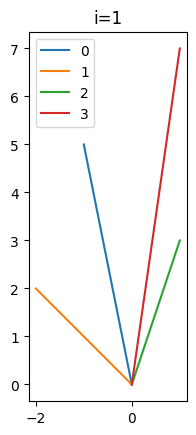

i=2, sumYsReal=-5.0, sumYsImag=15.0, sumYsReal**2 + sumYsImag**2=250.0


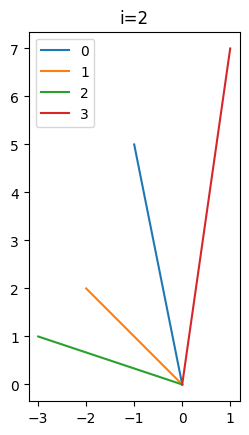

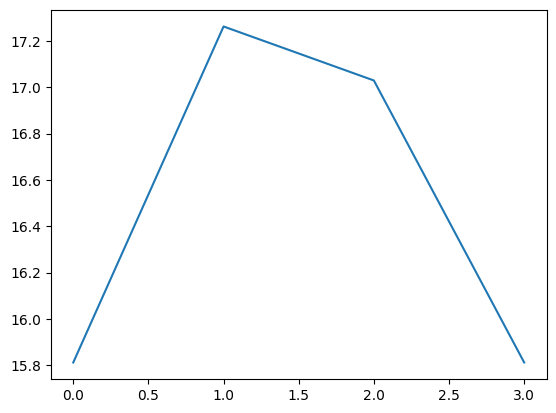

0/1/-5/-2/-2/1/3/-7/1,
1/5/1/2/2/1/3/1/7,
2/-1/5/2/2/1/3/1/7,
3/-1/5/-2/2/1/3/1/7,
4/-1/5/-2/2/-3/1/1/7

ansSlow=17.26267650163207, ansF1=17.263, ansF0=18.161
-1=-1, sum(x.real for x in Xs)=-0.044006082953921055, sum(x.imag for x in Xs)=0.7629939717023857
0=0, sumYsReal=0.83557375148013, sumYsImag=0.38515070508749827, sumYsReal**2 + sumYsImag**2=0.8465245597919752
i=0, sumYsReal=-0.1782885041318376, sumYsImag=0.9698561726580465, sumYsReal**2 + sumYsImag**2=0.9724077863484828
n=1, seed=0, ansSlow=0.986, ansF1=0.986, ansF0=1.002
-1=-1, sum(x.real for x in Xs)=-2.1008146940321515, sum(x.imag for x in Xs)=2.3850428592018043
0=0, sumYsReal=2.3850428592018043, sumYsImag=2.1008146940321515, sumYsReal**2 + sumYsImag**2=10.101851818890921
i=0, sumYsReal=0.13180720201094998, sumYsImag=4.106171627942409, sumYsReal**2 + sumYsImag**2=16.87801857662117
n=1, seed=1, ansSlow=4.108, ansF1=4.108, ansF0=4.126
-1=-1, sum(x.real for x in Xs)=-1.4389429435966126, sum(x.imag for x in Xs)=-1.01206814760592
0=

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product


def vis(N: int, Xs: list, title=""):
    for i in range(1 << N):
        plt.plot([0, Xs[i].real], [0, Xs[i].imag], label=f"{i}")
    plt.gca().set_aspect("equal", adjustable="box")
    if N <= 3:
        plt.legend()
    plt.title(title)
    plt.show()


def solveSlow(N: int, Xs: list):
    assert len(Xs) == 1 << N
    maxAbs = 0
    for phases in product(range(4), repeat=1 << n):
        x = 0.0 + 0.0j
        for i in range(1 << n):
            if phases[i] == 0:
                x += Xs[i]
            elif phases[i] == 1:
                x += Xs[i] * 1j
            elif phases[i] == 2:
                x += -Xs[i]
            elif phases[i] == 3:
                x += -Xs[i] * 1j
        absVal = abs(x)
        if maxAbs < absVal:
            maxAbs = absVal
    return maxAbs


def ansFast0(N: int, Xs: list):
    return sum(abs(X) for X in Xs)


def rotate(x):
    if x.imag >= 0:
        if x.real >= 0:
            return x
        else:
            return x * -1j
    else:
        if x.real <= 0:
            return -x
        else:
            return x * 1j


def ansFast1(N: int, Xs: list, do_vis: int):
    for_tex = ""

    def add_to_for_tex(idx, vals):
        nonlocal for_tex
        for_tex += f"{idx}/"
        for x in vals:
            if do_vis > 1:
                assert int(x.real) == x.real and int(x.imag) == x.imag
            for_tex += f"{int(x.real)}/{int(x.imag)}/"
        for_tex = for_tex[:-1]
        for_tex += ",\n"

    print(f"{-1=}, {sum(x.real for x in Xs)=}, {sum(x.imag for x in Xs)=}")
    rotated_Xs = [rotate(X) for X in Xs]
    Ys = rotated_Xs.copy()
    Ys.sort(key=lambda Y: (Y.imag / Y.real) if Y.real != 0 else 1e9)
    reordered_Xs = [Xs[rotated_Xs.index(Y)] for Y in Ys]
    if do_vis > 0:
        vis(N, reordered_Xs, "reordered_Xs")
    add_to_for_tex(0, reordered_Xs)
    sumYsReal = sum(Y.real for Y in Ys)
    sumYsImag = sum(Y.imag for Y in Ys)
    print(f"{0=}, {sumYsReal=}, {sumYsImag=}, {sumYsReal**2 + sumYsImag**2=}")
    maxAbs2 = sumYsReal**2 + sumYsImag**2
    absVals = [maxAbs2**0.5]
    add_to_for_tex(1, Ys)
    if do_vis > 0:
        vis(N, Ys, "Ys")
    for i in range((1 << N) - 1):
        sumYsReal += -Ys[i].real - Ys[i].imag
        sumYsImag += -Ys[i].imag + Ys[i].real
        print(f"{i=}, {sumYsReal=}, {sumYsImag=}, {sumYsReal**2 + sumYsImag**2=}")
        absVal2 = sumYsReal**2 + sumYsImag**2
        absVals.append(absVal2**0.5)
        maxAbs2 = max(maxAbs2, absVal2)
        Ys[i] *= 1j
        add_to_for_tex(i + 2, Ys)
        if do_vis > 0:
            vis(N, Ys, f"{i=}")
    if do_vis > 0:
        plt.plot(absVals)
        plt.show()
    if do_vis > 1:
        print(for_tex[:-2], end="\n\n")
    return maxAbs2**0.5


n = 2
Xs = [1 + 3j, -2 - 2j, -7 + 1j, +1 - 5j]
ansSlow = solveSlow(n, Xs)
ansF1 = ansFast1(n, Xs, 2)
ansF0 = ansFast0(n, Xs)
print(f"{ansSlow=}, {ansF1=:.3f}, {ansF0=:.3f}")

for n in [1, 2, 3]:
    for seed in range(3):
        Xs = np.random.normal(size=1 << n) + 1j * np.random.normal(size=1 << n)
        ansSlow = solveSlow(n, Xs)
        ansF1 = ansFast1(n, Xs, False)
        ansF0 = ansFast0(n, Xs)
        print(f"n={n}, seed={seed}, {ansSlow=:.3f}, {ansF1=:.3f}, {ansF0=:.3f}")
        assert np.isclose(ansSlow, ansF1)

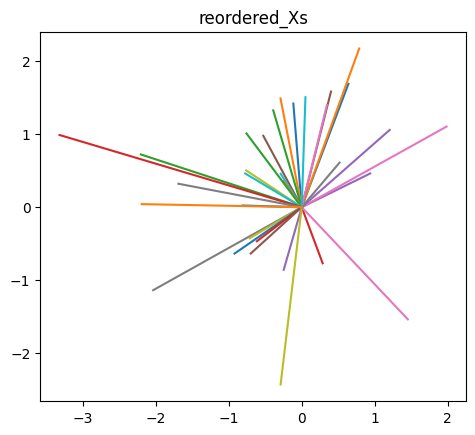

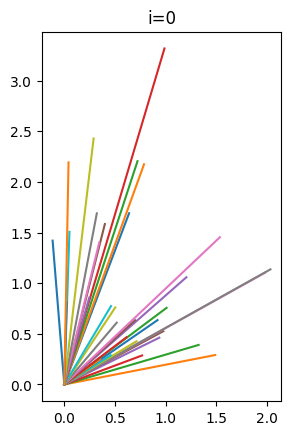

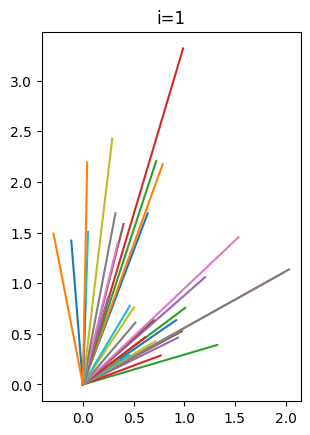

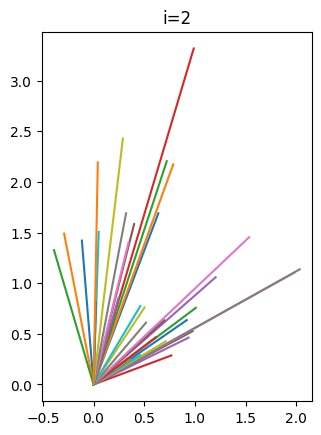

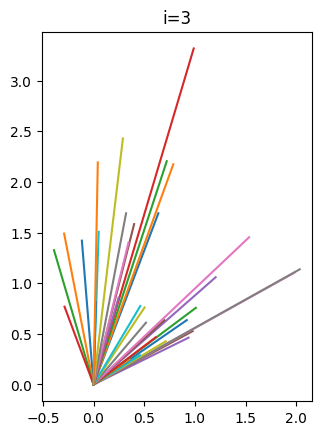

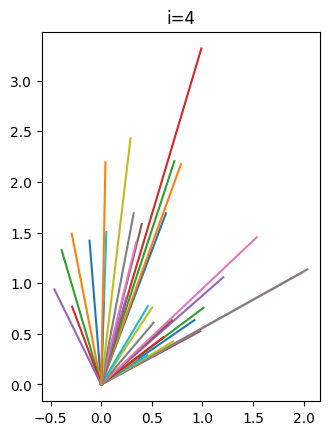

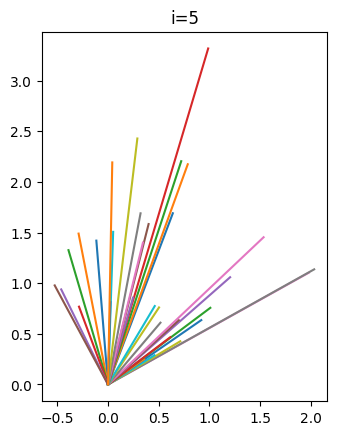

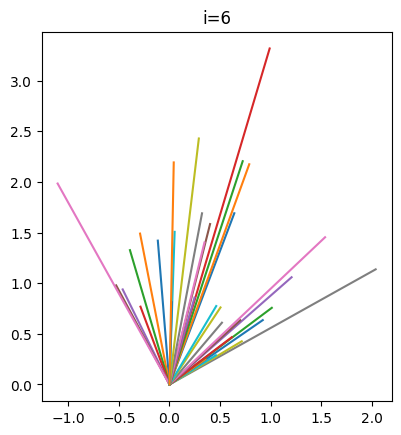

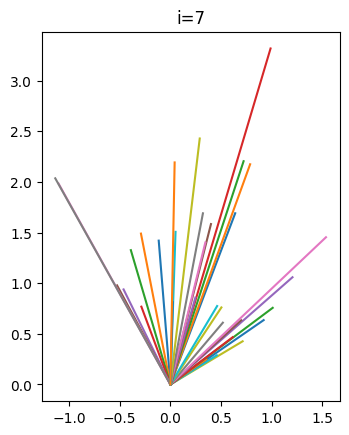

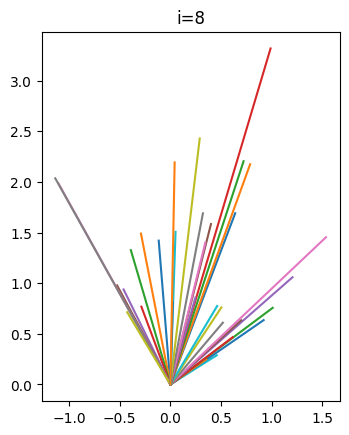

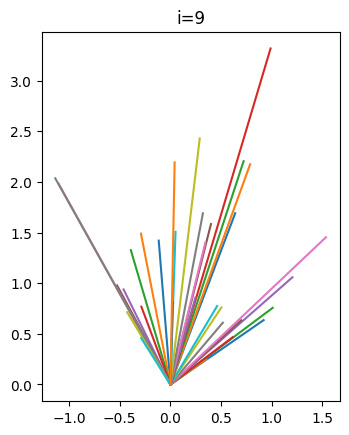

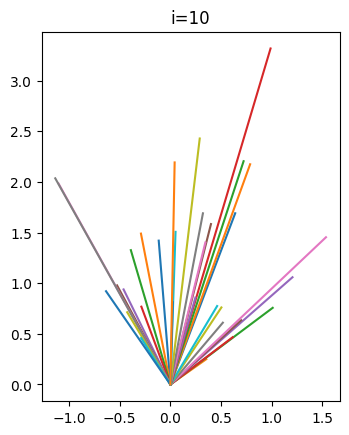

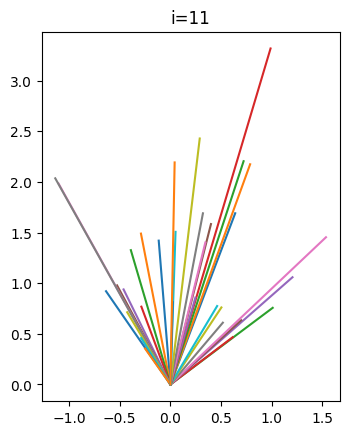

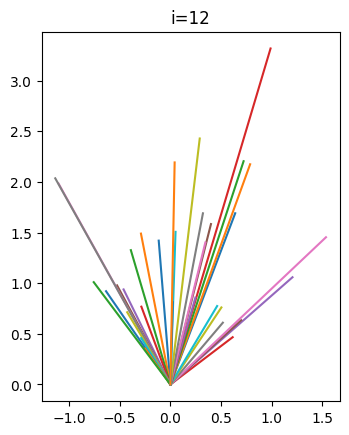

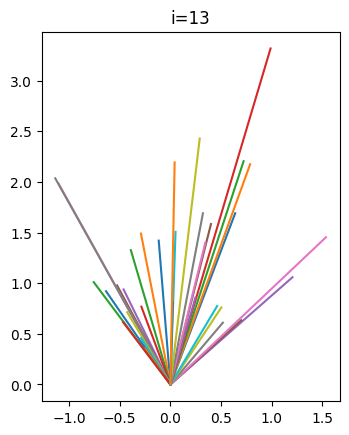

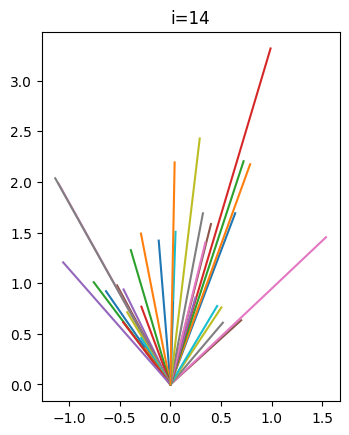

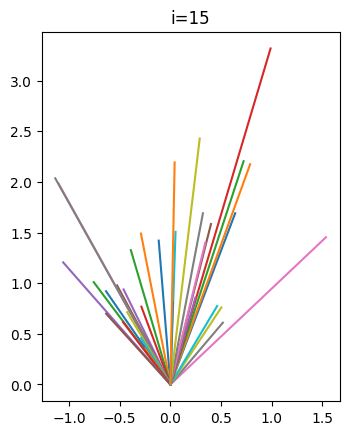

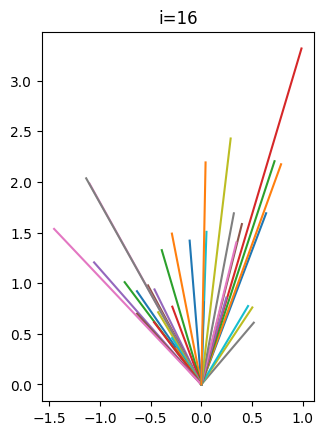

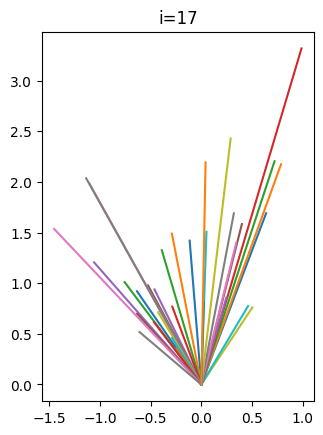

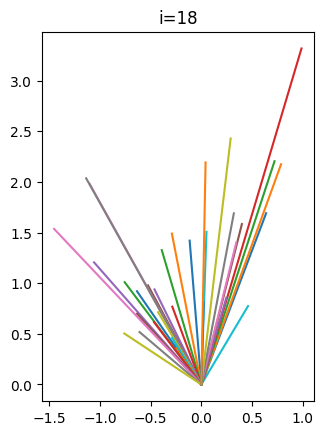

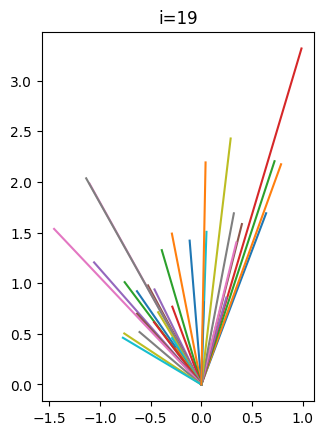

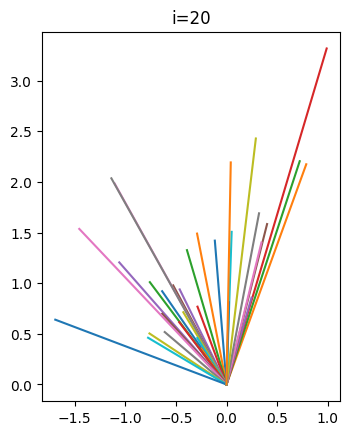

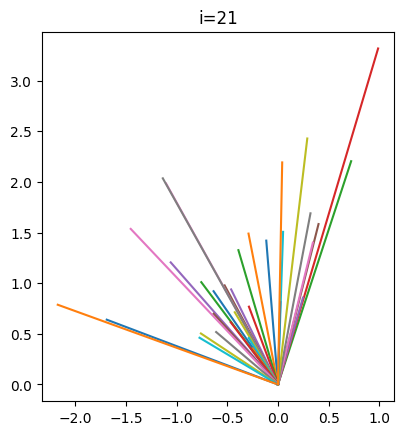

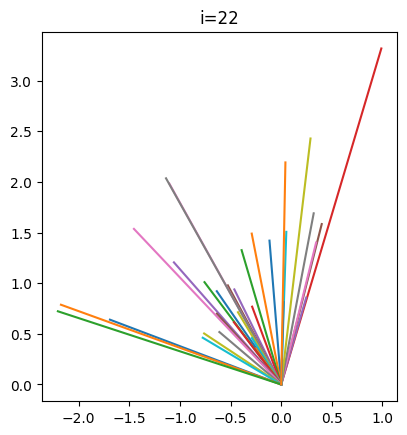

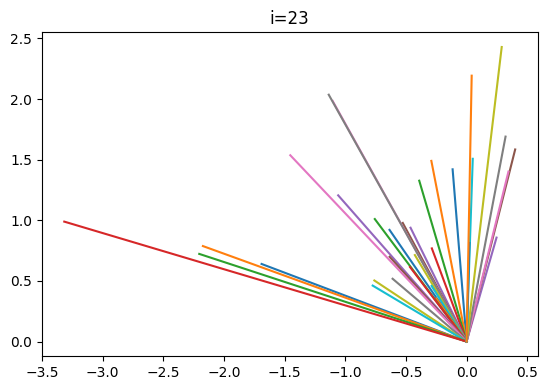

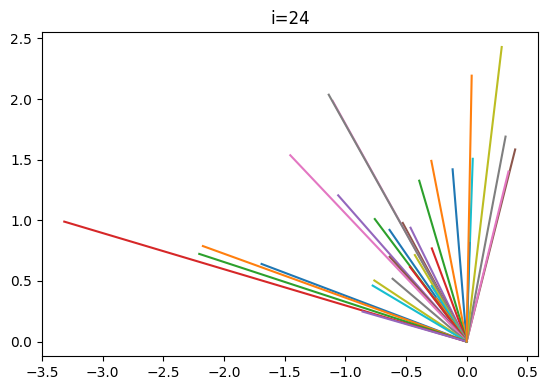

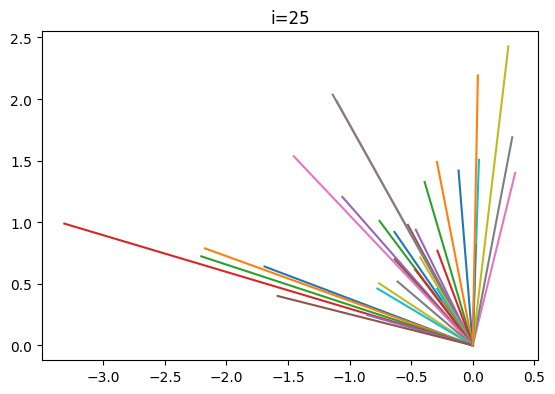

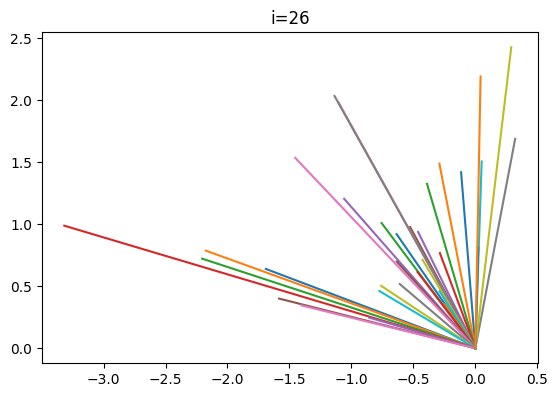

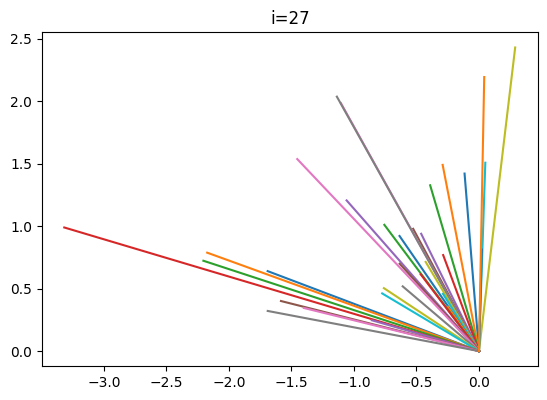

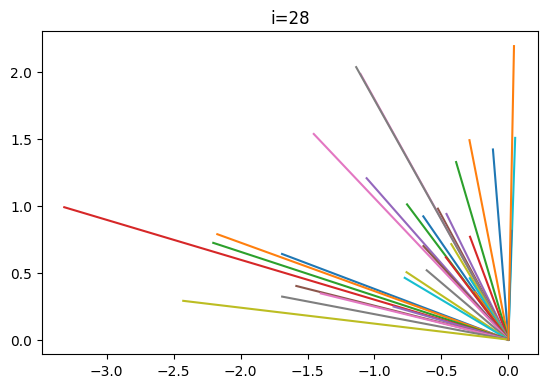

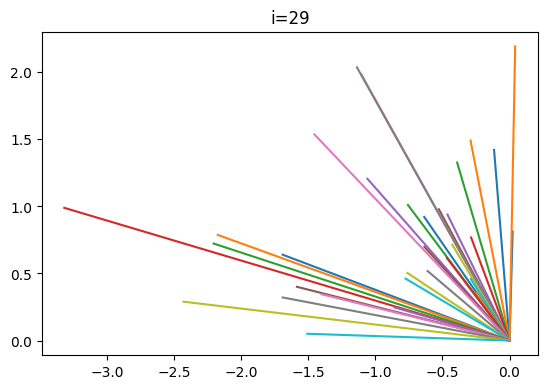

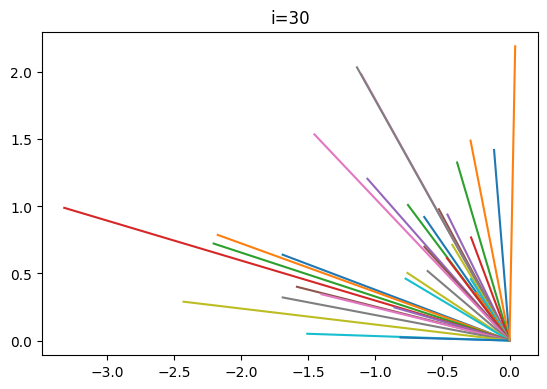

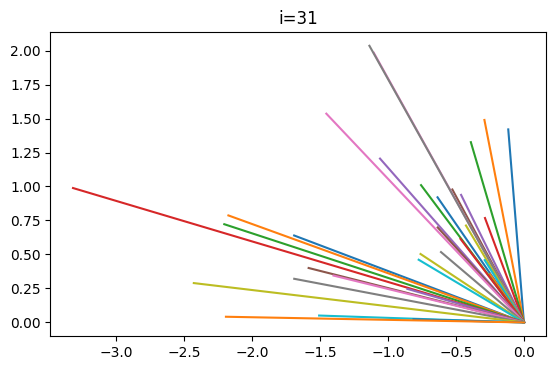

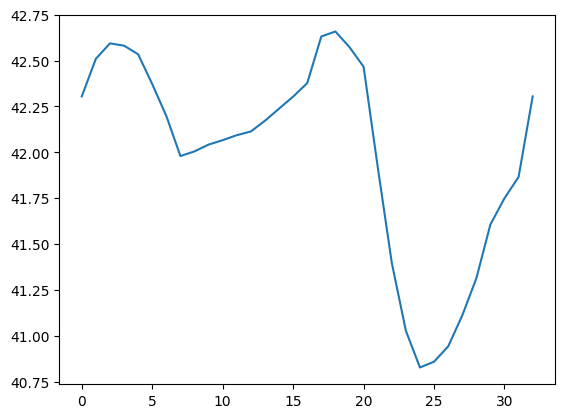

n=5, seed=0, ansF0=46.681, ansF1=42.659, t1-t0=6.15569 t2-t1=0.00002


In [16]:
import time

for n in [5]:
    for seed in range(1):
        Xs = np.random.normal(size=1 << n) + 1j * np.random.normal(size=1 << n)
        t0 = time.perf_counter()
        ansF1 = ansFast1(n, Xs, 1)
        t1 = time.perf_counter()
        ansF0 = ansFast0(n, Xs)
        t2 = time.perf_counter()
        print(
            f"n={n}, seed={seed}, {ansF0=:.3f}, {ansF1=:.3f}, {t1-t0=:.5f} {t2-t1=:.5f}"
        )